In [2]:
# Importo las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram
from kmodes.kmodes import KModes
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
import gower

In [3]:
# Cargar del dataset
url = 'https://raw.githubusercontent.com/Marian2057/TrabajoFinal-CR/main/BaseCRold.xlsx'
base = pd.read_excel(url, engine='openpyxl')

## 1.	PARTE I. Estadística descriptiva.
a.	¿Qué columnas tiene?¿Qué tipo de columnas son?
b.	Análisis y aplicación de Medidas de Tendencia Central.
c.	Análisis y aplicación de Medidas de Dispersión.
d.	Análisis de covarianza entre las variables.

El set de datos corresponde a los datos de productores beneficiarios del Programa Cambio Rural.
Dentro del conjunto de datos disponibles de esos beneficiarios se escogieron inicialmente la región,
provincia, sexo, edad, rango etario, educación, porcentaje de ingresos mensuales que aporta el
emprendimiento acompañado por CR, situación AFIP, caracterización (variables construida en base a
ciertos datos del productor y la superficie que ocupa para ese emprendimiento específico.
Del análisis exploratorio inicial, surge que el dataset cuenta con 13391 observaciones y las 10
columnas/variables mencionadas, de las cuales 8 son categóricas y 2 son cuantitativas. Se observan
también datos faltantes en algunas de ellas.

## Exploración del Dataset

In [4]:
# Exploración del dataset
base.head(5)

,Coordinación,Provincia,Sexo,Edad,Rango_etario,Educación,Ingresos,SituacionAFIP,Caracterización,superficie
0,NOA,Jujuy,Femenino,NaN,Menor de 30,Ninguna,Menos del 30%,NaN,Productor familiar capitalizado,0
1,Patagonia,Chubut,Femenino,NaN,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,Productor familiar capitalizado,0
2,Centro,Córdoba,Femenino,NaN,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,Productor familiar capitalizado,0
3,Bs As-La Pampa,Buenos Aires,Masculino,NaN,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B,Productor familiar capitalizado,0
4,Patagonia,Chubut,Masculino,NaN,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C,Productor familiar capitalizado,300


### ¿Qué columnas tiene?

In [55]:
base.columns

Index(['Coordinación', 'Provincia', 'Sexo', 'Edad', 'Rango_etario',
       'Educación', 'Ingresos', 'SituacionAFIP', 'Caracterización',
       'superficie'],
      dtype='object')

### ¿Qué tipo de columnas son?

Tenemos 8 variables categoricas y dos numericas

In [6]:
print("Variables del dataset \n")
base.info()

Variables del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13391 entries, 0 to 13390
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coordinación     13391 non-null  object 
 1   Provincia        13391 non-null  object 
 2   Sexo             13391 non-null  object 
 3   Edad             12989 non-null  float64
 4   Rango_etario     13391 non-null  object 
 5   Educación        13391 non-null  object 
 6   Ingresos         13391 non-null  object 
 7   SituacionAFIP    12389 non-null  object 
 8   Caracterización  13391 non-null  object 
 9   superficie       13391 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.0+ MB


In [61]:
# Trabajo con los NaN para reemplazar Superficie por su logaritmo y suavizar la disperción 


# convierto los Nan de edad en 0 ya que cero despues lo voy a filtrar porque la edad va de 18 a 99 y lo que me 
# interesa es no tener valores nulos

import numpy as np

base['Edad'].fillna(0, inplace=True)

base["Edad"] = base["Edad"].astype(int)

# Trabajo con los NaN para reemplazar Superficie por su logaritmo y suavizar la disperción 


#Para filtrar los ceros de la columna superficie, puedes hacer lo siguiente:
base[base['superficie'] != 0]

#Para codificar NaN como -1 y dejar los valores cero en 0, uso la función numpy.where:
import numpy as np


base.loc[base['superficie'] == 0, 'superficie'] = 0
base.loc[base['superficie'] > 0, 'superficie'] = np.log(base.loc[base['superficie'] > 0, 'superficie'])

base.loc[:, 'superficie'] = base['superficie'].fillna(-1)
#base["superficie"] = base["superficie"].astype(int)

### b. Análisis y aplicación de Medidas de Tendencia Central

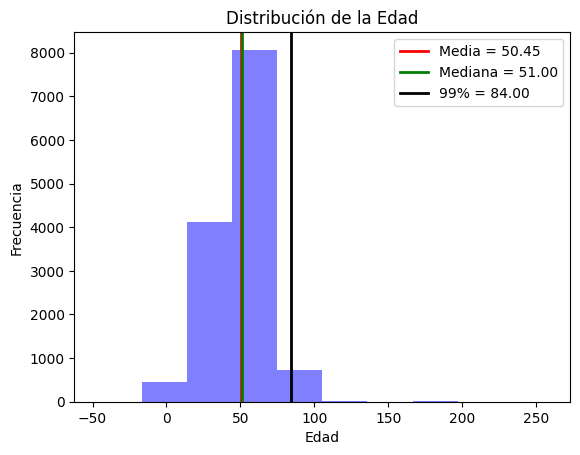

In [62]:
media_edad = np.mean(base["Edad"])
mediana_edad = np.median(base["Edad"])
min_edad = np.min(base["Edad"])
max_edad = np.max(base["Edad"])
rango_edad = max_edad - min_edad
std_edad = np.std(base["Edad"])
p99_edad = np.percentile(base["Edad"], 99)

# Armamos el gráfico
plt.hist(base["Edad"], color='blue', alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad")
plt.axvline(media_edad, color='red', linewidth=2, label=f'Media = {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linewidth=2, label=f'Mediana = {mediana_edad:.2f}')
plt.axvline(p99_edad, color='black', linewidth=2, label=f'99% = {p99_edad:.2f}')

plt.legend()
plt.show()

In [63]:
print(f"La edad mínima es: {min_edad}")
print(f"La edad máxima es: {max_edad}")
print(f"El rango de edad es: {rango_edad}")
print(f"El error standard de edad es: {std_edad:.4f}")

La edad mínima es: -47
La edad máxima es: 258
El rango de edad es: 305
El error standard de edad es: 17.0132


In [64]:
p25_edad = np.percentile(base["Edad"], 25)
p50_edad = np.percentile(base["Edad"], 50)
p60_edad = np.percentile(base["Edad"], 60)
p75_edad = np.percentile(base["Edad"], 75)
p95_edad = np.percentile(base["Edad"], 95)
print(f"El percentil 25 es: {p25_edad}; \nEl percentil 50 es: {p50_edad}; \nEl percentil 60 es: {p60_edad}; \nEl percentil 75 es: {p75_edad}; \nEl percentil 95 es: {p95_edad}; \nEl percentil 99 es: {p99_edad}")

El percentil 25 es: 41.0; 
El percentil 50 es: 51.0; 
El percentil 60 es: 55.0; 
El percentil 75 es: 62.0; 
El percentil 95 es: 75.0; 
El percentil 99 es: 84.0


### c. Análisis y aplicación de Medidas de Dispersión.

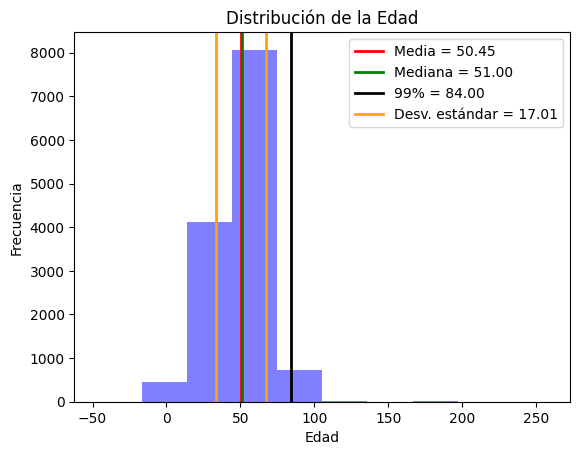

Desviación estándar: 17.0131897257145
Varianza: 289.4486246431574
Rango intercuartil: 21.0
Coeficiente de variación: 33.720674878932364


In [65]:
# Calculamos las medidas de dispersión
std_edad = np.std(base["Edad"])
var_edad = np.var(base["Edad"])
iqr_edad = np.subtract(np.percentile(base["Edad"], 75), np.percentile(base["Edad"], 25))
cv_edad = (std_edad / media_edad) * 100

# Armamos el gráfico
plt.hist(base["Edad"], color='blue', alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad")
plt.axvline(media_edad, color='red', linewidth=2, label=f'Media = {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linewidth=2, label=f'Mediana = {mediana_edad:.2f}')
plt.axvline(p99_edad, color='black', linewidth=2, label=f'99% = {p99_edad:.2f}')
plt.axvline(media_edad + std_edad, color='orange', linewidth=2, label=f'Desv. estándar = {std_edad:.2f}')
plt.axvline(media_edad - std_edad, color='orange', linewidth=2)
plt.legend()
plt.show()

# Imprimimos las medidas de dispersión
print("Desviación estándar:", std_edad)
print("Varianza:", var_edad)
print("Rango intercuartil:", iqr_edad)
print("Coeficiente de variación:", cv_edad)

### d.	Análisis de covarianza entre las variables.

In [66]:
#El análisis de covarianza (ANCOVA) se utiliza para examinar si existe una relación entre una variable dependiente y una variable independiente, mientras se controlan los efectos de otras variables independientes (también conocidas como covariables). La covarianza es una medida de cómo varían conjuntamente dos variables. Si las dos variables tienden a variar juntas (es decir, cuando una variable es alta, la otra también lo es), entonces la covarianza será positiva. Si las dos variables tienden a variar en direcciones opuestas (es decir, cuando una variable es alta, la otra es baja), entonces la covarianza será negativa.

#Para realizar un análisis de covarianza en Python, se puede utilizar la función scipy.stats.linregress() de la biblioteca SciPy. Esta función calcula una regresión lineal simple y devuelve varios valores, incluyendo la covarianza entre las dos variables.

#Supongamos que tenemos un conjunto de datos que contiene dos variables, una variable independiente llamada "X" y una variable dependiente llamada "Y". El siguiente código muestra cómo se puede calcular la covarianza entre las dos variables utilizando scipy.stats.linregress():

from scipy.stats import linregress

# Extraemos los datos de las columnas "Edad" y "superficie"
edad = base["Edad"]
superficie = base["superficie"]

# Calculamos la covarianza entre ambas variables
cov = np.cov(edad, superficie)

# Imprimimos la covarianza
print("Covarianza entre Edad y superficie:")
print(cov[0, 1])

Covarianza entre Edad y superficie:
4.613664440776402


# 2. PARTE II. Modelado supervisado o No supervisado.
b. En caso que no supervisado. i. Implementar el modelo de acuerdo a las variables de agrupamiento o predictoras que consideren mejor. ii. Evaluar cuál es el mejor número de clusters para agrupar el conjunto de datos.

## Limpiando los datos

### **Variables categóricas

Luego de una exploración breve de las variables categóricas, siendo el objetivo de este trabajo la
identificación de un “Perfil de beneficiario”, llegamos a la conclusión de que las variables de ubicación
geográfica no aportaban mayor información, ya que el Programa es de alcance nacional. Queda
eventualmente la posibilidad de incorporarlas, luego, para verificar si aportan o no algo de información.
La variable “sexo” tampoco aporta mucha información ya que sabemos de antemano que los varones son
amplia mayoría. Se la podrá incorporar más adelante para evaluar si aporta o no.
Dejaremos fuera la variable “caracterización” ya que es una construcción que realiza el Sistema de Gestión
del Programa y no queremos que influya en la detección de patrones subyacentes.

### **Variables cuantitativas

Comenzamos el análisis de las cuantitativas para evaluar su utilidad para la generación de clusters.
El estudio de la variable superficie muestra mucha dispersión en los datos con un rango de 50.000 Has, y la
suposición de que se trata de errores de carga ya que la caracterización de los beneficiarios oscila entre
productores familiares en vías de ser capitalizados y PYMES. Así mismo, dentro de los beneficiarios hay
quienes tienen actividades tales como servicios, turismo u otras, que no requieren de la explotación de
tierras por lo que la superficie utilizada tiene un valor genuino de cero.
En este punto, vemos que uno de los métodos más comunes para lidiar con grandes rangos como lo es el
uso de logaritmos, se ve afectado por ser una función que no está definida en el cero. La posibilidad de
sustituir por la media no nos pareció adecuada en estas circunstancias. Otro tema del cual ocuparse son los
NaN.
Se pensó como alternativa la utilización de una función partida para el uso del logaritmo, donde la función
es 0 para x=0; Null para x=NaN y Log(x) para x&gt;0. En este caso tendríamos además una “sobrecarga” de
ceros, por los ceros genuinos y los provocados por el log(1). se decidió trabajar con las siguientes variables categoricas Rango etario, educación, ingresos y situación AFIP.

In [7]:
base_nueva = base[['Rango_etario', 'Educación', 'Ingresos', 'SituacionAFIP']]
base_nueva.head()

,Rango_etario,Educación,Ingresos,SituacionAFIP
0,Menor de 30,Ninguna,Menos del 30%,NaN
1,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto
2,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto
3,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B
4,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C


*** reemplazamos los nan por el valor no declarado asi no perdemos datos en la base


In [52]:
# reemplazamos los nan por el valor no declarado
base_nueva_copy = base_nueva.copy()
base_nueva_copy.fillna("No declarado", inplace=True)
base_nueva.head()

,Rango_etario,Educación,Ingresos,SituacionAFIP,Rango_etarioNum,EducacionNum,IngresosNum,SituacionAFIPNum,cluster_CAO,cluster_Huang
0,Menor de 30,Ninguna,Menos del 30%,No declarado,0,0,0,0,0,0
1,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
2,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
3,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B,0,0,2,6,0,1
4,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C,0,0,2,7,0,1


In [9]:
# Exploro las variables categóricas

print("Valores que toman las variables \n")

print("Rango Etario: ", set(base_nueva["Rango_etario"]), "\n Ítems: ", len(set(base_nueva["Rango_etario"])),'\n')
print("Nivel de Educación: ", set(base_nueva["Educación"]), "\n Ítems: ", len(set(base_nueva["Educación"])),'\n')
print("Ingresos por la Actividad: ", set(base_nueva["Ingresos"]), "\n Ítems: ", len(set(base_nueva["Ingresos"])),'\n')
print("Situación AFIP: ", set(base_nueva["SituacionAFIP"]), "\n Ítems: ", len(set(base_nueva["SituacionAFIP"])),'\n')


Valores que toman las variables 

Rango Etario:  {'Más de 55', 'De 31 a 45', 'De 46 a 55', 'Menor de 30'} 
 Ítems:  4 

Nivel de Educación:  {' Terciario', ' Primario', ' Postgrado', ' Universitario', ' Secundario', ' Ninguna'} 
 Ítems:  6 

Ingresos por la Actividad:  {'Más del 50%', 'Menos del 30%', 'Entre 30% y 50%'} 
 Ítems:  3 

Situación AFIP:  {'Responsable Inscripto', 'Monotributo Cat J', 'Monotributo Cat K', 'Monotributo Cat A', 'No declarado', 'Monotributo Cat G', 'Monotributo social', 'Monotributo Cat F', 'Monotributo Cat H', 'No responsable', 'Responsable no inscripto', 'Monotributo Cat B', 'Monotributo Cat E', 'Monotributo Cat I', 'Monotributo Cat D', 'Sujeto exento', 'Monotributo Cat C'} 
 Ítems:  17 



In [10]:
base_nueva.describe()

,Rango_etario,Educación,Ingresos,SituacionAFIP
count,13391,13391,13391,13391
unique,4,6,3,17
top,Más de 55,Secundario,Más del 50%,Responsable Inscripto
freq,5326,5510,5808,3909


In [11]:
base_nueva.nunique()

Rango_etario      4
Educación         6
Ingresos          3
SituacionAFIP    17
dtype: int64

In [12]:
# confirmamos que no tenemos valores nulos
base_nueva.isnull().sum()*100/base_nueva.shape[0]

Rango_etario     0.0
Educación        0.0
Ingresos         0.0
SituacionAFIP    0.0
dtype: float64

## Construcción del Modelo
Nuestro objetivo en este cuaderno es solo demostrar el algoritmo K-modes, y omitiremos en esta ocación el EDA y nos pasaremos directamente a la construcción del modelo


*** Contrucción del modelo
Convertimos las variables categoricas a numericas

In [53]:
rango_etario_map = {'Menor de 30': 0, 'De 31 a 45': 1, 'De 46 a 55': 2, 'Más de 55': 3}
nivel_educacion_map = {' Ninguna': 0, ' Primario': 1, ' Secundario': 2, ' Terciario': 3, ' Universitario': 4, ' Postgrado': 5}
ingresos_actividad_map = {'Menos del 30%': 0, 'Entre 30% y 50%': 1, 'Más del 50%': 2}
situacion_afip_map = {'No declarado': 0, 'No responsable': 1, 'Responsable no inscripto': 2, 'Responsable Inscripto': 3, 'Sujeto exento': 4, 'Monotributo Cat A': 5, 'Monotributo Cat B': 6, 'Monotributo Cat C': 7, 'Monotributo Cat D': 8, 'Monotributo Cat E': 9, 'Monotributo Cat F': 10, 'Monotributo Cat G': 11, 'Monotributo Cat H': 12, 'Monotributo Cat I': 13, 'Monotributo Cat J': 14, 'Monotributo Cat K': 15, 'Monotributo social': 16}

# Creamos las nuevas columnas numéricas para cada variable
base_nueva.loc[:,'Rango_etarioNum'] = base_nueva['Rango_etario'].map(rango_etario_map)
base_nueva.loc[:,'EducacionNum'] = base_nueva['Educación'].map(nivel_educacion_map)
base_nueva.loc[:,'IngresosNum'] = base_nueva['Ingresos'].map(ingresos_actividad_map)
base_nueva.loc[:,'SituacionAFIPNum'] = base_nueva['SituacionAFIP'].map(situacion_afip_map)

base_nueva.head(5)

# Verificamos que las nuevas columnas se hayan agregado correctamente

,Rango_etario,Educación,Ingresos,SituacionAFIP,Rango_etarioNum,EducacionNum,IngresosNum,SituacionAFIPNum,cluster_CAO,cluster_Huang
0,Menor de 30,Ninguna,Menos del 30%,No declarado,0,0,0,0,0,0
1,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
2,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
3,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B,0,0,2,6,0,1
4,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C,0,0,2,7,0,1


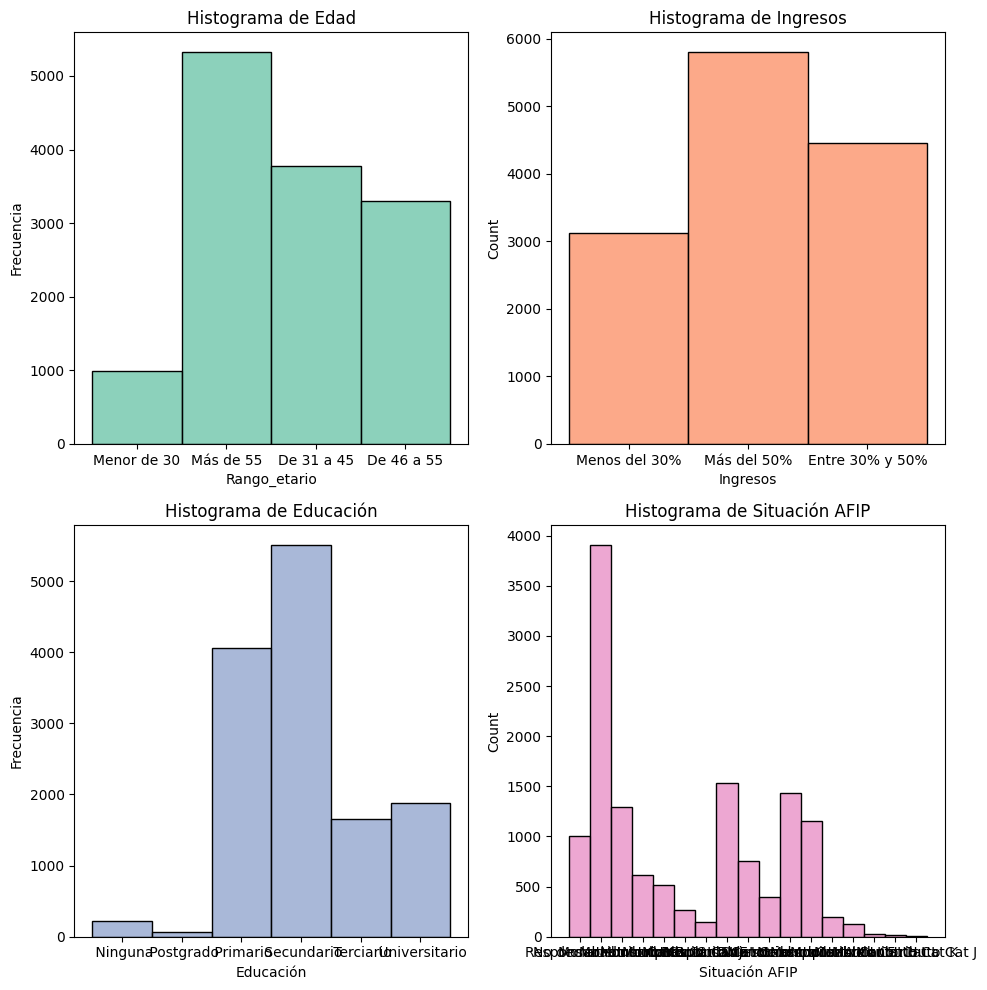

In [14]:
# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Especificar la paleta de colores
palette = sns.color_palette("Set2", n_colors=8)

# Crear los histogramas para cada variable y asignarles un color diferente
sns.histplot(base_nueva, x='Rango_etario', bins=10, color=palette[0], ax=axs[0, 0])
sns.histplot(base_nueva, x='Ingresos', bins=10, color=palette[1], ax=axs[0, 1])
sns.histplot(base_nueva, x='Educación', bins=10, color=palette[2], ax=axs[1, 0])
sns.histplot(base_nueva, x='SituacionAFIP', bins=10, color=palette[3], ax=axs[1, 1])

# Ajustar los títulos y los ejes de cada subplot
axs[0, 0].set_title('Histograma de Edad')
axs[0, 1].set_title('Histograma de Ingresos')
axs[1, 0].set_title('Histograma de Educación')
axs[1, 1].set_title('Histograma de Situación AFIP')
axs[0, 0].set_ylabel('Frecuencia')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].set_xlabel('Educación')
axs[1, 1].set_xlabel('Situación AFIP')

# Ajustar el espacio entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

<Axes: xlabel='Educación', ylabel='count'>

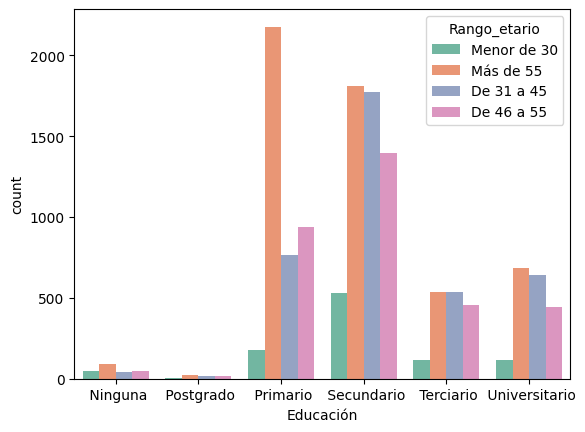

In [15]:
# Este gráfico te permitirá visualizar cuántos individuos hay en cada nivel de educación y rango etario, y cómo se distribuyen en cada categoría.

sns.set_palette('Set2') # establece una paleta de colores
sns.countplot(x='Educación', hue='Rango_etario', data=base_nueva)

<Axes: xlabel='Rango_etario', ylabel='count'>

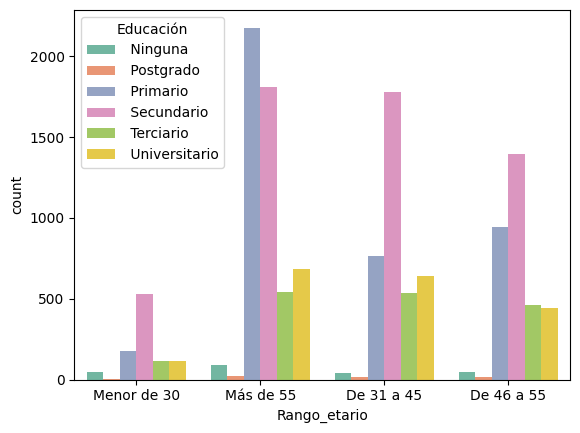

In [16]:
sns.set_palette('Set2') # establece una paleta de colores
sns.countplot(x='Rango_etario', hue='Educación', data=base_nueva)

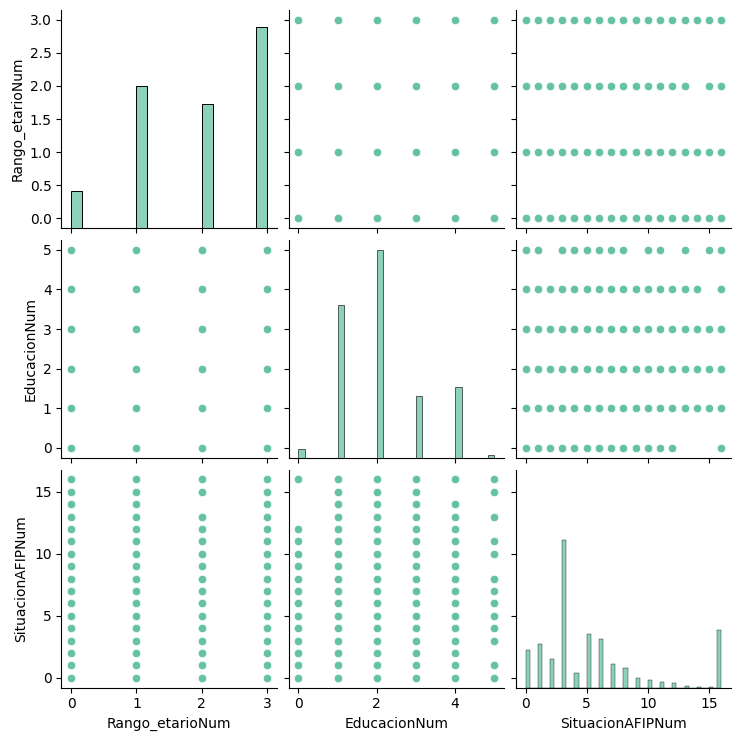

In [17]:
#Este código creará un gráfico de matriz de dispersión que muestra la relación entre las tres variables en el marco base_nueva. La diagonal muestra histogramas de cada variable individual, mientras que las otras celdas muestran gráficos de dispersión bidimensionales que muestran la relación entre dos variables. Además, puedes agregar el argumento hue a la función pairplot para agregar una cuarta variable como una variable de color que resalta los diferentes grupos o categorías.

sns.pairplot(base_nueva[['Rango_etarioNum', 'EducacionNum', 'SituacionAFIPNum']])


## Comenzamos a utilizar los métodos para clusterizar

## ------------- K-MODES ---------------

### Usando K-Modes con Inicialización "CAO"

In [47]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 5, verbose=1)
fitClusters_cao = km_cao.fit_predict(base_nueva.iloc[:,4:8]) # Utilizamos la parte codificada de la base

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25075.0


In [48]:
# prediccion de clusters
fitClusters_cao
clusterCentroid_C = pd.DataFrame(km_cao.cluster_centroids_)

In [49]:
clusterCentroid_C.columns = base_nueva.iloc[:,4:8].columns
#Mode of the clusters
clusterCentroid_C

,Rango_etarioNum,EducacionNum,IngresosNum,SituacionAFIPNum
0,3,2,2,3
1,1,1,1,16
2,2,2,1,5


### Usando K-Modes con Inicialización "Huang"

In [23]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=1)
fitClusters_huang = km_huang.fit_predict(base_nueva.iloc[:,4:8]) # Utilizamos la parte codificada de la base

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1696, cost: 26080.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3953, cost: 25707.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4323, cost: 24331.0
Run 4, iteration: 2/100, moves: 500, cost: 24331.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2880, cost: 24710.0
Run 5, iteration: 2/100, moves: 1089, cost: 24710.0
Best run was number 4


In [ ]:
# prediccion de clusters
fitClusters_huang
clusterCentroid_H = pd.DataFrame(km_huang.cluster_centroids_)

In [ ]:
clusterCentroid_H.columns = base_nueva.iloc[:,4:8].columns
#Mode of the clusters
clusterCentroid_H

### Elegir K comparando el costo con cada K

In [24]:
# Costos para CAO

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose = 1)
    kmode.fit_predict(base_nueva.iloc[:,4:8])
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 33011.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 27363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 25075.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 23569.0


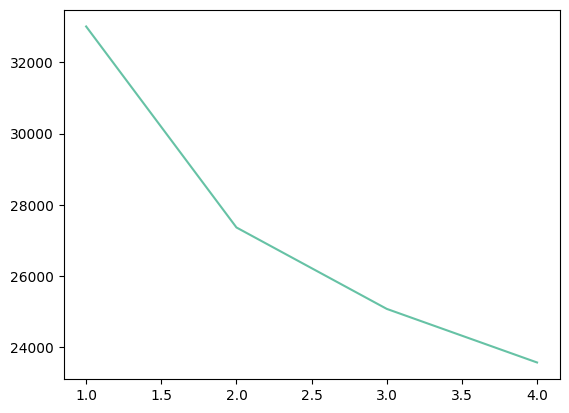

In [25]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost);

In [54]:
# Agrega los clusters generados por CAO y Huang como columnas al dataframe original

base_nueva.loc[:,'cluster_CAO'] = fitClusters_cao
cluster_counts_CAO = base_nueva["cluster_CAO"].value_counts()
print(cluster_counts_CAO)

base_nueva['cluster_Huang'] = fitClusters_huang
cluster_counts_Huang = base_nueva["cluster_Huang"].value_counts()
print(cluster_counts_Huang)

cluster_CAO
0    8246
1    3348
2    1797
Name: count, dtype: int64
cluster_Huang
0    5810
1    3978
2    3603
Name: count, dtype: int64


<Axes: >

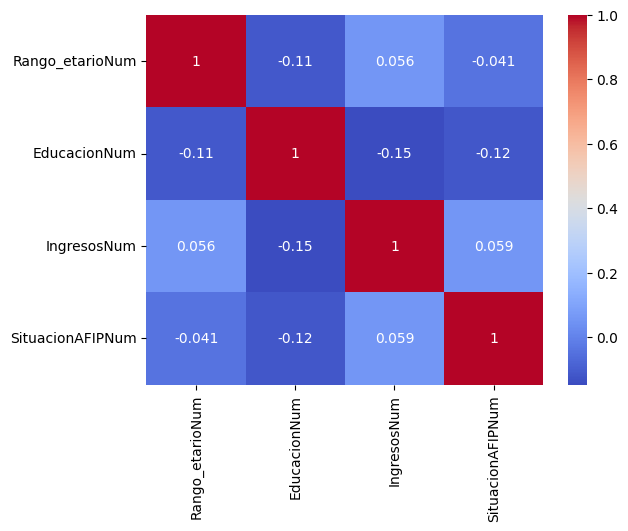

In [27]:
# Calcular la matriz de correlación
corr_matrix = base_nueva.iloc[:,4:8].corr()

# Generar el mapa de calor con seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [28]:
base_nueva.head(5)

,Rango_etario,Educación,Ingresos,SituacionAFIP,Rango_etarioNum,EducacionNum,IngresosNum,SituacionAFIPNum,cluster_CAO,cluster_Huang
0,Menor de 30,Ninguna,Menos del 30%,No declarado,0,0,0,0,0,0
1,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
2,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,0,0,2,3,0,1
3,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B,0,0,2,6,0,1
4,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C,0,0,2,7,0,1


### Características de los clusters

In [29]:
Cluster_0_CAO = base_nueva[base_nueva['cluster_CAO'] == 0]
Cluster_1_CAO = base_nueva[base_nueva['cluster_CAO'] == 1]
Cluster_2_CAO = base_nueva[base_nueva['cluster_CAO'] == 2]
Cluster_3_CAO = base_nueva[base_nueva['cluster_CAO'] == 3]
Cluster_4_CAO = base_nueva[base_nueva['cluster_CAO'] == 4]

In [30]:
print(Cluster_0_CAO["Rango_etario"].describe())
print(Cluster_0_CAO["Educación"].describe())
print(Cluster_0_CAO["Ingresos"].describe())
print(Cluster_0_CAO["SituacionAFIP"].describe())

count          8246
unique            4
top       Más de 55
freq           4555
Name: Rango_etario, dtype: object
count            8246
unique              6
top        Secundario
freq             3950
Name: Educación, dtype: object
count            8246
unique              3
top       Más del 50%
freq             5229
Name: Ingresos, dtype: object
count                      8246
unique                       17
top       Responsable Inscripto
freq                       3513
Name: SituacionAFIP, dtype: object


In [31]:
print(Cluster_1_CAO["Rango_etario"].describe())
print(Cluster_1_CAO["Educación"].describe())
print(Cluster_1_CAO["Ingresos"].describe())
print(Cluster_1_CAO["SituacionAFIP"].describe())

count           3348
unique             4
top       De 31 a 45
freq            1968
Name: Rango_etario, dtype: object
count          3348
unique            6
top        Primario
freq           1942
Name: Educación, dtype: object
count                3348
unique                  3
top       Entre 30% y 50%
freq                 2144
Name: Ingresos, dtype: object
count                   3348
unique                    17
top       Monotributo social
freq                     929
Name: SituacionAFIP, dtype: object


In [32]:
print(Cluster_2_CAO["Rango_etario"].describe())
print(Cluster_2_CAO["Educación"].describe())
print(Cluster_2_CAO["Ingresos"].describe())
print(Cluster_2_CAO["SituacionAFIP"].describe())

count           1797
unique             4
top       De 46 a 55
freq            1385
Name: Rango_etario, dtype: object
count            1797
unique              6
top        Secundario
freq             1058
Name: Educación, dtype: object
count                1797
unique                  3
top       Entre 30% y 50%
freq                 1128
Name: Ingresos, dtype: object
count                  1797
unique                   17
top       Monotributo Cat A
freq                    688
Name: SituacionAFIP, dtype: object


In [33]:
print(Cluster_3_CAO["Rango_etario"].describe())
print(Cluster_3_CAO["Educación"].describe())
print(Cluster_3_CAO["Ingresos"].describe())
print(Cluster_3_CAO["SituacionAFIP"].describe())

count       0
unique      0
top       NaN
freq      NaN
Name: Rango_etario, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: Educación, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: Ingresos, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: SituacionAFIP, dtype: object


In [34]:
print(Cluster_4_CAO["Rango_etario"].describe())
print(Cluster_4_CAO["Educación"].describe())
print(Cluster_4_CAO["Ingresos"].describe())
print(Cluster_4_CAO["SituacionAFIP"].describe())

count       0
unique      0
top       NaN
freq      NaN
Name: Rango_etario, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: Educación, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: Ingresos, dtype: object
count       0
unique      0
top       NaN
freq      NaN
Name: SituacionAFIP, dtype: object


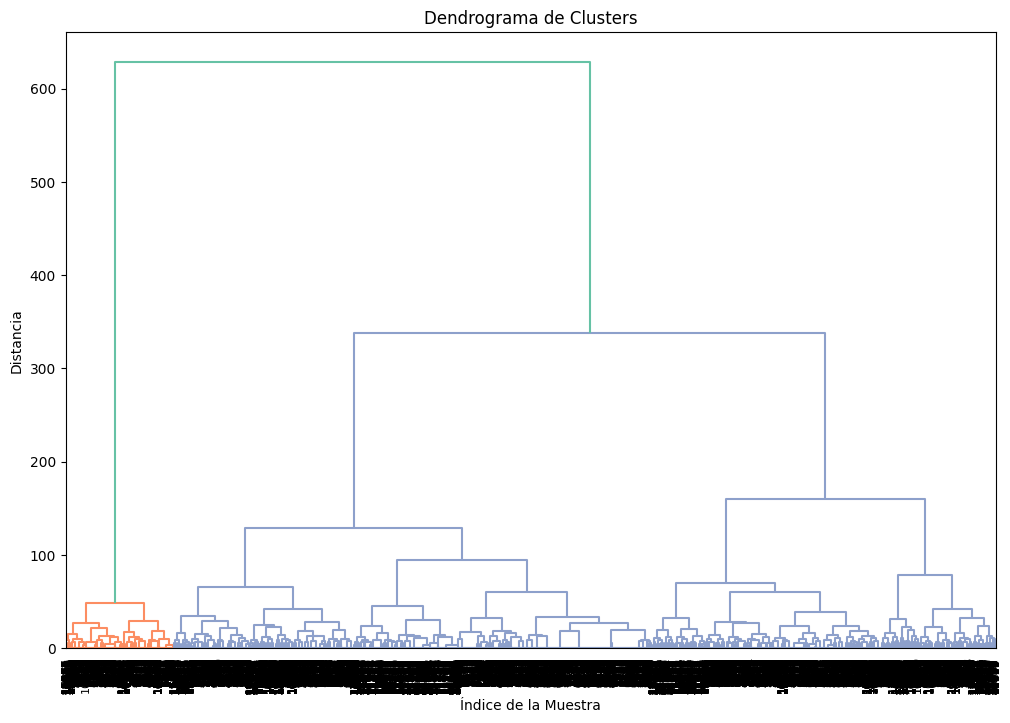

In [35]:
# Calcular la matriz de enlace
Z = linkage(base_nueva.iloc[:,4:8], method='ward')

# Crear el dendrograma
plt.figure(figsize=(12, 8))
plt.title('Dendrograma de Clusters')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

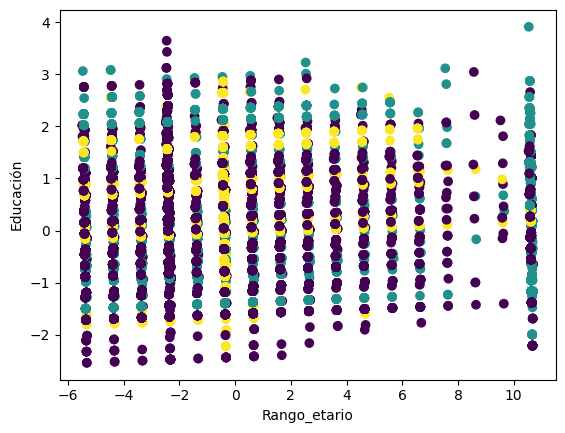

In [38]:
# Para visualizar los puntos en el espacio de dos dimensiones, puedes utilizar una técnica de reducción de dimensionalidad 
# como el Análisis de Componentes Principales (PCA) o el t-SNE. Estas técnicas te permiten proyectar los datos en un espacio 
# de dos dimensiones de tal manera que se preserva la estructura de similitud entre los puntos en el espacio original. Luego 
# puedes utilizar un gráfico de dispersión para visualizar los puntos en el espacio de dos dimensiones y colorearlos según su 
# etiqueta de cluster para ver si existe alguna estructura en los datos.
# Esto te mostrará un gráfico de dispersión de los datos reducidos a dos dimensiones utilizando PCA, donde cada punto está 
# coloreado según su etiqueta de cluster. Si existen estructuras en los datos, deberías ver grupos de puntos con el mismo 
# color cerca unos de otros.

from sklearn.decomposition import PCA

# Crear una instancia de PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicar PCA a los datos
pca_encoded = pca.fit_transform(base_nueva.iloc[:,4:8])

# Crear un gráfico de dispersión de los datos reducidos a 2 dimensiones y colorear los puntos según su etiqueta de cluster
plt.scatter(pca_encoded[:, 0], pca_encoded[:, 1], c=fitClusters_cao)
plt.xlabel('Rango_etario')
plt.ylabel('Educación')
plt.show()

<Axes: >

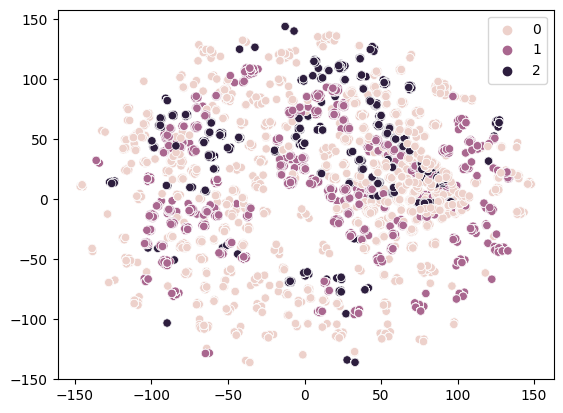

In [36]:
#Este código aplicará t-SNE con 2 componentes, una perplexidad de 30 y una semilla aleatoria de 42, a los datos codificados en encoded_base. Luego, creará un scatterplot con los puntos en el espacio reducido por t-SNE, coloreando los puntos según el cluster al que pertenecen. Así, podrás visualizar si hay patrones o agrupaciones de puntos en los datos.

from sklearn.manifold import TSNE

# Crear una instancia de TSNE con los parámetros deseados
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# Aplicar TSNE a tus datos
embedded_data = tsne.fit_transform(base_nueva.iloc[:,4:8])

# Crear un scatterplot con los puntos en el espacio reducido por TSNE, coloreando los puntos por el cluster al que pertenecen
sns.scatterplot(x=embedded_data[:, 0], y=embedded_data[:, 1], hue=fitClusters_cao)
